# MELANOMA DETECTION ASSIGNMENT

### Import relevant libraries and Define the path for train and test images

In [45]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import PIL
import Augmentor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

tf.get_logger().setLevel('ERROR')

In [2]:
train_data_dir = pathlib.Path("data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_data_dir = pathlib.Path('data/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
## Determine size Train/Test data
train_size = len(list(train_data_dir.glob('*/*.jpg')))
test_size = len(list(test_data_dir.glob('*/*.jpg')))
print("Count of Training Images:", train_size )
print("Count of Test Images:", test_size )

Count of Training Images: 2239
Count of Test Images: 118


### Load using keras.preprocessing

In [4]:
batch_size = 32
image_height = 180
image_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=batch_size,
    image_size=(image_height, image_width),
    seed=200,
    validation_split=0.2,
    subset='training',
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=batch_size,
    image_size=(image_height, image_width),
    seed=200,
    validation_split=0.2,
    subset='validation',
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### Define Reusable Functions

In [9]:
# Print Wrapper
def fn_header_print(msg):
    print(100 * "-")
    print(msg)
    print(100 * "-", "\n")

# Function for Compiling Model
def fn_model_compile(**kwargs):   
    model_id = kwargs['model_id']
    kwargs['model'].compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        metrics=['accuracy']
    )
    fn_header_print(f"'{model_id}' Compiled")
    return kwargs['model']
    
# Function for Model Fit
def fn_model_fit(**kwargs):
    epochs = kwargs['epochs']
    model_id = kwargs['model_id']
    model = kwargs['model']
    fn_header_print(f"Running model.fit for {model_id} with epoch = {epochs}")
    return model.fit(
      train_ds,
      validation_data=validation_ds,
      epochs=epochs
    )
    
# Function to Visualize Training Results
def fn_viz_model_results(**kwargs):
    epochs = kwargs["epochs"]
    model_id = kwargs['model_id']
    fn_header_print(f"Visualize Training Results for {model_id}")
    
    history = kwargs["history"]
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training Accuracy Vs Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training Loss Vs Validation Loss')
    plt.show()

### Data Visualization

In [72]:
fn_header_print("Display the different Classes")

class_names = train_ds.class_names
class_names

----------------------------------------------------------------------------------------------------
Display the different Classes
---------------------------------------------------------------------------------------------------- 



['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

----------------------------------------------------------------------------------------------------
Visualize one instance of all the nine classes present in the dataset
---------------------------------------------------------------------------------------------------- 



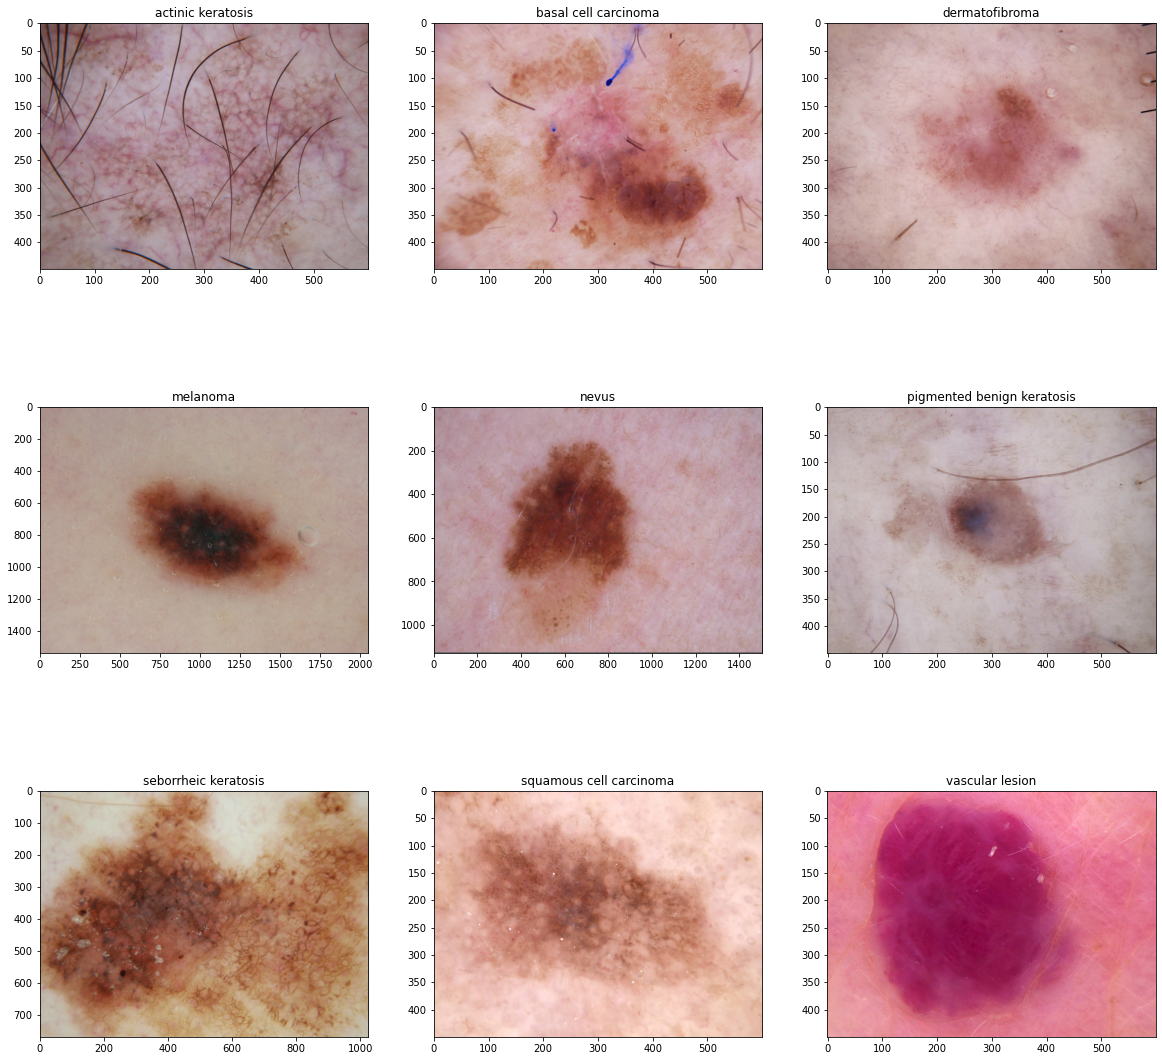

In [71]:
fn_header_print("Visualize one instance of all the nine classes present in the dataset")

plt.figure(figsize=(20,20))
for i in range(len(class_names)):
    plt.subplot(3, 3, i+1)
    plt.title(class_names[i])
    image= plt.imread(str(list(train_data_dir.glob(class_names[i]+'/*.jpg'))[1]))
    plt.imshow(image)

### Initial Model Building

In [10]:
num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),    
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class)
])

### Initial Model Compilation

In [11]:
model = fn_model_compile(model_id="model_1", model=model)

----------------------------------------------------------------------------------------------------
'model_1' Compiled
---------------------------------------------------------------------------------------------------- 



In [12]:
fn_header_print("Printing Model Summary")
model.summary()

----------------------------------------------------------------------------------------------------
Printing Model Summary
---------------------------------------------------------------------------------------------------- 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin

In [13]:
epochs_glob=20
history_1 = fn_model_fit(model_id="model_1", model=model, epochs=epochs_glob)

----------------------------------------------------------------------------------------------------
Running model.fit for model_1 with epoch = 20
---------------------------------------------------------------------------------------------------- 

Epoch 1/20
56/56 [==============================] - 41s 701ms/step - loss: 1.9920 - accuracy: 0.2467 - val_loss: 1.9456 - val_accuracy: 0.2304
Epoch 2/20
56/56 [==============================] - 40s 686ms/step - loss: 1.6409 - accuracy: 0.4068 - val_loss: 1.4680 - val_accuracy: 0.4676
Epoch 3/20
56/56 [==============================] - 41s 709ms/step - loss: 1.4635 - accuracy: 0.4994 - val_loss: 1.3329 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 43s 740ms/step - loss: 1.3764 - accuracy: 0.5257 - val_loss: 1.5212 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 48s 842ms/step - loss: 1.2727 - accuracy: 0.5603 - val_loss: 1.5009 - val_accuracy: 0.4944
Epoch 6/20
56/56 [=================

### Visualize Training Results

----------------------------------------------------------------------------------------------------
Visualize Training Results for model_1
---------------------------------------------------------------------------------------------------- 



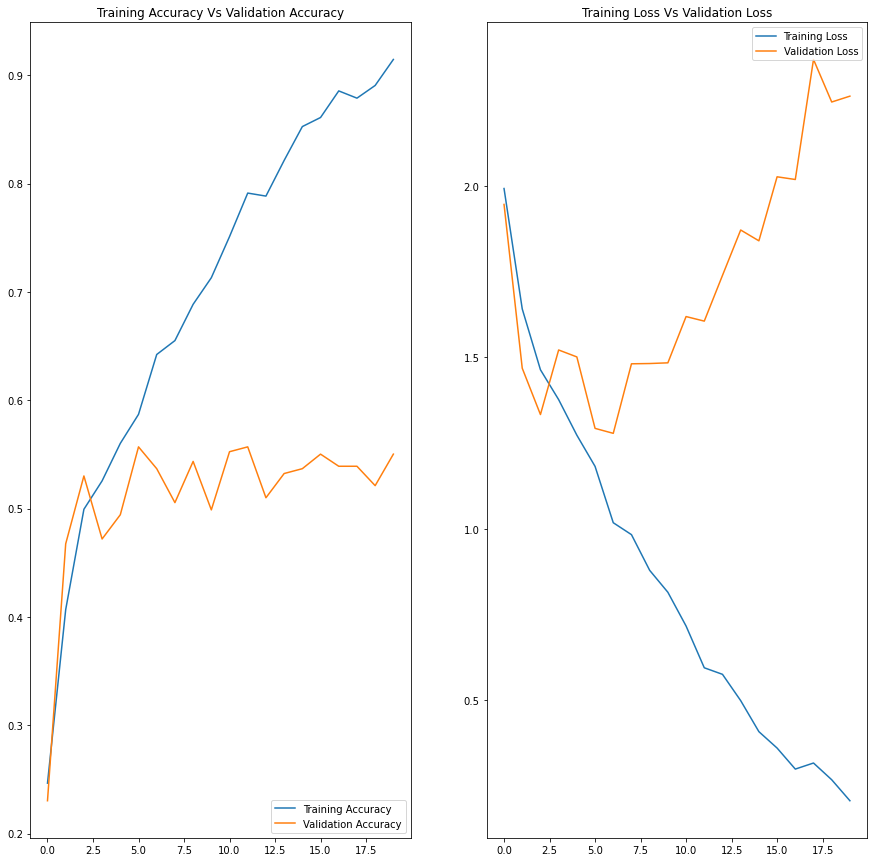

In [14]:
fn_viz_model_results(model_id="model_1", history=history_1, epochs=epochs_glob)

### Observations of Initial Model
- Since Training Accuracy is significantly higher than the Validation Accuracy, this is a clear indication of the model being overfit
- The loss on the validation set shoots up after the 10th epoch





### Data Augmentation

In [75]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

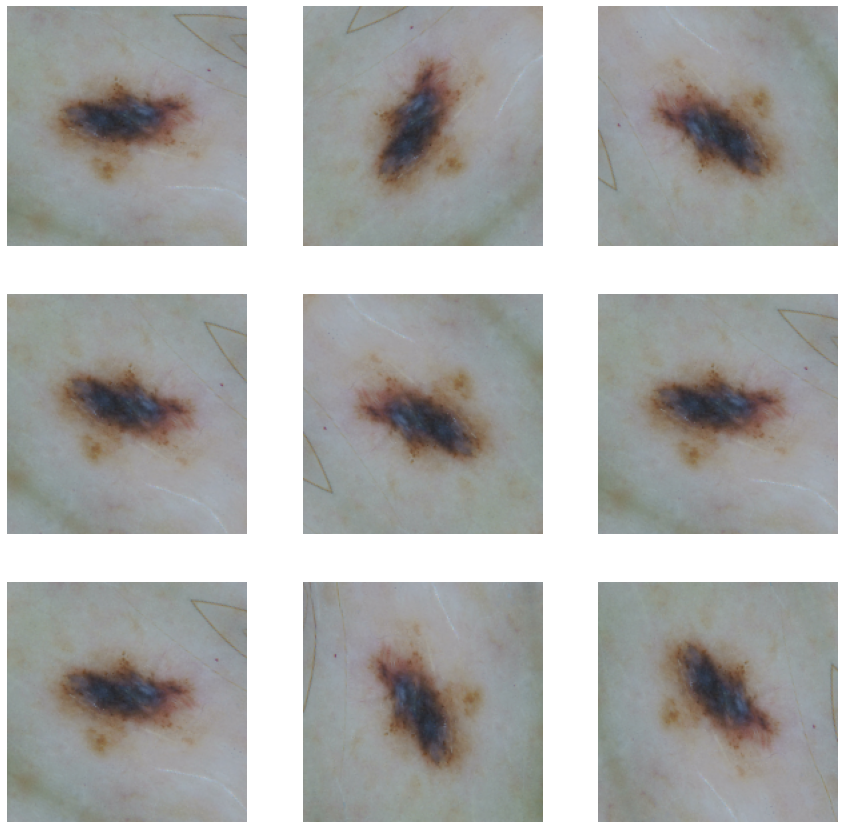

In [76]:
   
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(15, 15))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image_1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image_1))
  plt.axis("off")



### Create Model 2 with Dropout

In [77]:
num_classes = 9
drop_out_rate = 0.3
model_2 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(drop_out_rate),
    layers.Conv2D(32, 3, padding='same', activation='relu'),    
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(drop_out_rate),
    layers.Conv2D(64, 3, padding='same', activation='relu'),    
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(drop_out_rate),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(drop_out_rate),
    layers.Dense(num_classes)
])

### Compile and Fit Model 2

In [38]:
model_2 = fn_model_compile(model_id="model_2", model=model_2)

----------------------------------------------------------------------------------------------------
'model_2' Compiled
---------------------------------------------------------------------------------------------------- 



In [39]:
history_2 = fn_model_fit(model_id="model_2", model=model_2, epochs=epochs_glob)

----------------------------------------------------------------------------------------------------
Running model.fit for model_2 with epoch = 20
---------------------------------------------------------------------------------------------------- 

Epoch 1/20
56/56 [==============================] - 39s 653ms/step - loss: 1.9889 - accuracy: 0.2589 - val_loss: 1.7206 - val_accuracy: 0.3826
Epoch 2/20
56/56 [==============================] - 39s 681ms/step - loss: 1.7363 - accuracy: 0.3828 - val_loss: 1.5366 - val_accuracy: 0.4474
Epoch 3/20
56/56 [==============================] - 42s 729ms/step - loss: 1.5364 - accuracy: 0.4643 - val_loss: 1.3696 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 51s 904ms/step - loss: 1.4842 - accuracy: 0.4894 - val_loss: 1.3848 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 42s 734ms/step - loss: 1.4428 - accuracy: 0.4927 - val_loss: 1.4247 - val_accuracy: 0.4631
Epoch 6/20
56/56 [=================

### Visualize Model 2 Training Results

----------------------------------------------------------------------------------------------------
Visualize Training Results for model_2
---------------------------------------------------------------------------------------------------- 



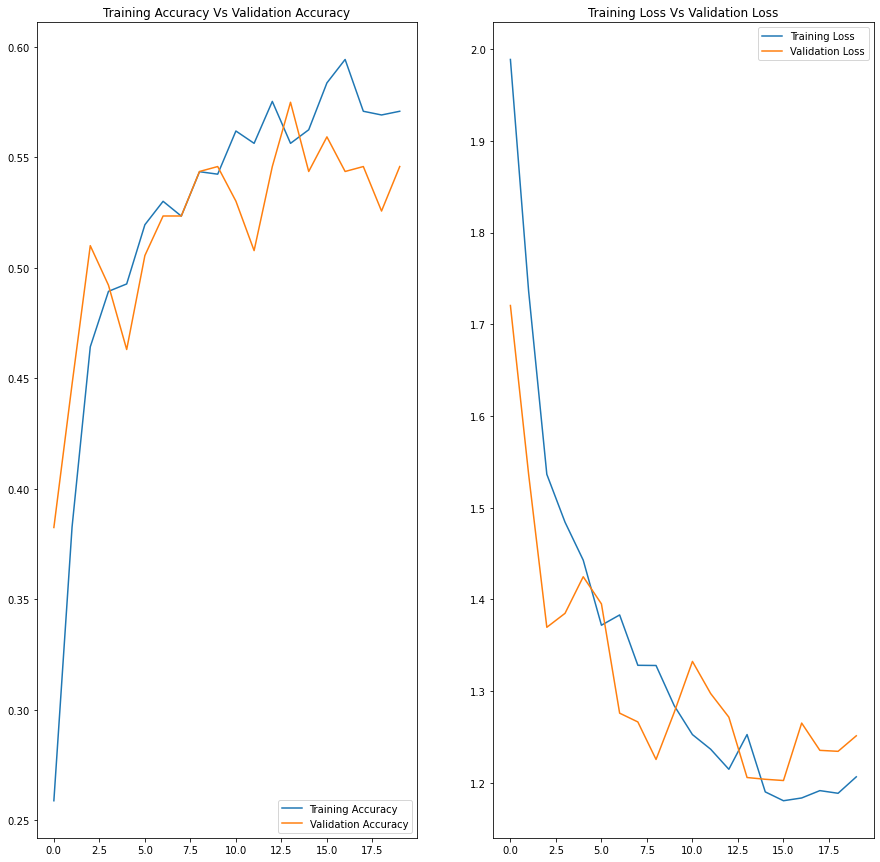

In [41]:
fn_viz_model_results(model_id="model_2", history=history_2, epochs=epochs_glob)

### Observations of Model 2
- The Training Accurracy is now more in line with the Validation Accuracy which indicates that the model is not overfitting
- Introduction of Dropout rate improved the model but the test accuracy of the model is similar to the initial model


### CLASS IMBALANCE CHECK

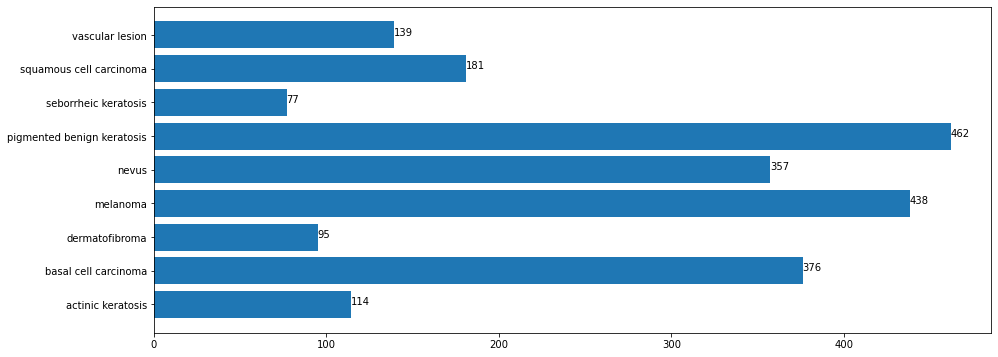

In [42]:
fn_header_print("Bar Plot to check for Class Imbalance")

count_list=[]
for class_name in class_names:
    count_list.append(len(list(train_data_dir.glob(class_name + '/*.jpg'))))

plt.figure(figsize=(15,6))
plt.barh(class_names, count_list)
 
for index, value in enumerate(count_list):
    plt.text(value, index, str(value))
 
plt.show()


### Observations on Class Imbalance
- As seen in the above plot, there is class imbalance which might be contributing to the low accuracy of the model
- The Class imbalance will be handled with an Augmentor in the below sections


### Handle Class Imbalance with Augmentor (Add 1000 Samples)

In [61]:
#!pip install Augmentor

fn_header_print("Augmenting the training dataset with a sample of 1000 files")

for class_name in class_names:
    p = Augmentor.Pipeline(str(train_data_dir) + "/" + class_name)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)
    

Initialised with 114 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28AA59B7280>: 100%|██████████| 1000/1000 [00:09<00:00, 101.88 Samples/s]                 


Initialised with 376 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28AA601C5B0>: 100%|██████████| 1000/1000 [00:11<00:00, 83.99 Samples/s]                 


Initialised with 95 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x28AA592C1C0>: 100%|██████████| 1000/1000 [00:12<00:00, 78.08 Samples/s]


Initialised with 438 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x28AA585B190>: 100%|██████████| 1000/1000 [00:59<00:00, 16.87 Samples/s]


Initialised with 357 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28AA6F35760>: 100%|██████████| 1000/1000 [00:51<00:00, 19.38 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28AA6BAEE50>: 100%|██████████| 1000/1000 [00:11<00:00, 88.34 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x28AA66C8CA0>: 100%|██████████| 1000/1000 [00:25<00:00, 39.59 Samples/s]                 


Initialised with 181 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x28AA5FE2220>: 100%|██████████| 1000/1000 [00:10<00:00, 92.76 Samples/s]


Initialised with 139 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28AA69734F0>: 100%|██████████| 1000/1000 [00:10<00:00, 95.25 Samples/s]                  


----------------------------------------------------------------------------------------------------
Validate Augmentor Output Directories for total Sample Size
---------------------------------------------------------------------------------------------------- 



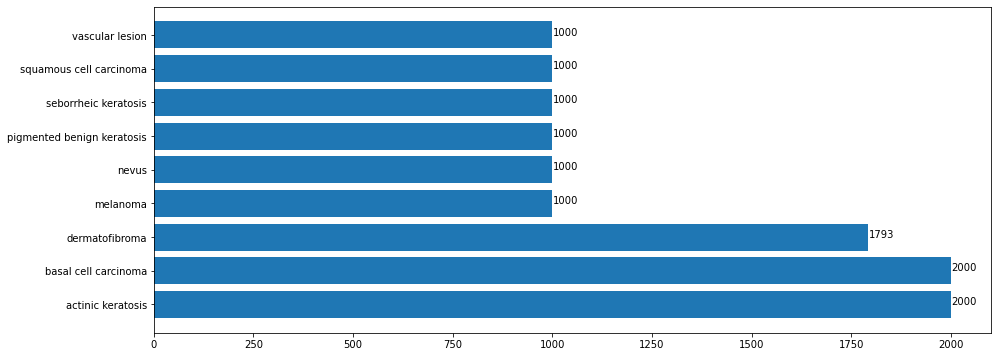

In [66]:
fn_header_print("Validate Augmentor Output Directories for total Sample Size")

count_list=[]
for class_name in class_names:
    count_list.append(len(list(train_data_dir.glob(class_name + '/output/*'))))

plt.figure(figsize=(15,6))
plt.barh(class_names, count_list)
 
for index, value in enumerate(count_list):
    plt.text(value, index, str(value))
 
plt.show()


In [80]:
fn_header_print("Create New Training Dataset")

train_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=200,
    validation_split = 0.2,
    subset = 'training',
    image_size=(image_height, image_width),
    batch_size=batch_size
)


----------------------------------------------------------------------------------------------------
Create New Training Dataset
---------------------------------------------------------------------------------------------------- 

Found 14032 files belonging to 9 classes.
Using 11226 files for training.


In [82]:
fn_header_print("Create New Validation Dataset")

validation_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=200,
    validation_split = 0.2,
    subset = 'validation',
    image_size=(image_height, image_width),
    batch_size=batch_size
)


----------------------------------------------------------------------------------------------------
Create New Validation Dataset
---------------------------------------------------------------------------------------------------- 

Found 14032 files belonging to 9 classes.
Using 2806 files for validation.


### Create Model_3 with Augmented Data [20 epochs]

In [90]:
num_classes = 9
drop_out_rate = 0.3
model_3 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(drop_out_rate),
    layers.Conv2D(32, 3, padding='same', activation='relu'),    
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(drop_out_rate),
    layers.Conv2D(64, 3, padding='same', activation='relu'),    
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(drop_out_rate),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(drop_out_rate),
    layers.Dense(num_classes)
])

### Compile and Fit Model_3

In [86]:
model_3 = fn_model_compile(model_id="model_3", model=model_3)

----------------------------------------------------------------------------------------------------
'model_3' Compiled
---------------------------------------------------------------------------------------------------- 



In [89]:
history_3 = fn_model_fit(model_id="model_3", model=model_3, epochs=30)

----------------------------------------------------------------------------------------------------
Running model.fit for model_3 with epoch = 20
---------------------------------------------------------------------------------------------------- 

Epoch 1/20
56/56 [==============================] - 38s 675ms/step - loss: 1.3050 - accuracy: 0.5396 - val_loss: 1.2789 - val_accuracy: 0.5324
Epoch 2/20
56/56 [==============================] - 39s 676ms/step - loss: 1.2968 - accuracy: 0.5452 - val_loss: 1.3065 - val_accuracy: 0.5168
Epoch 3/20
56/56 [==============================] - 38s 665ms/step - loss: 1.3635 - accuracy: 0.5246 - val_loss: 1.2789 - val_accuracy: 0.5235
Epoch 4/20
56/56 [==============================] - 38s 662ms/step - loss: 1.2564 - accuracy: 0.5625 - val_loss: 1.2135 - val_accuracy: 0.5526
Epoch 5/20
56/56 [==============================] - 37s 647ms/step - loss: 1.2069 - accuracy: 0.5737 - val_loss: 1.3483 - val_accuracy: 0.5056
Epoch 6/20
56/56 [=================

### Visualize Model_3 Training Results [30 epochs]

----------------------------------------------------------------------------------------------------
Visualize Training Results for model_3
---------------------------------------------------------------------------------------------------- 



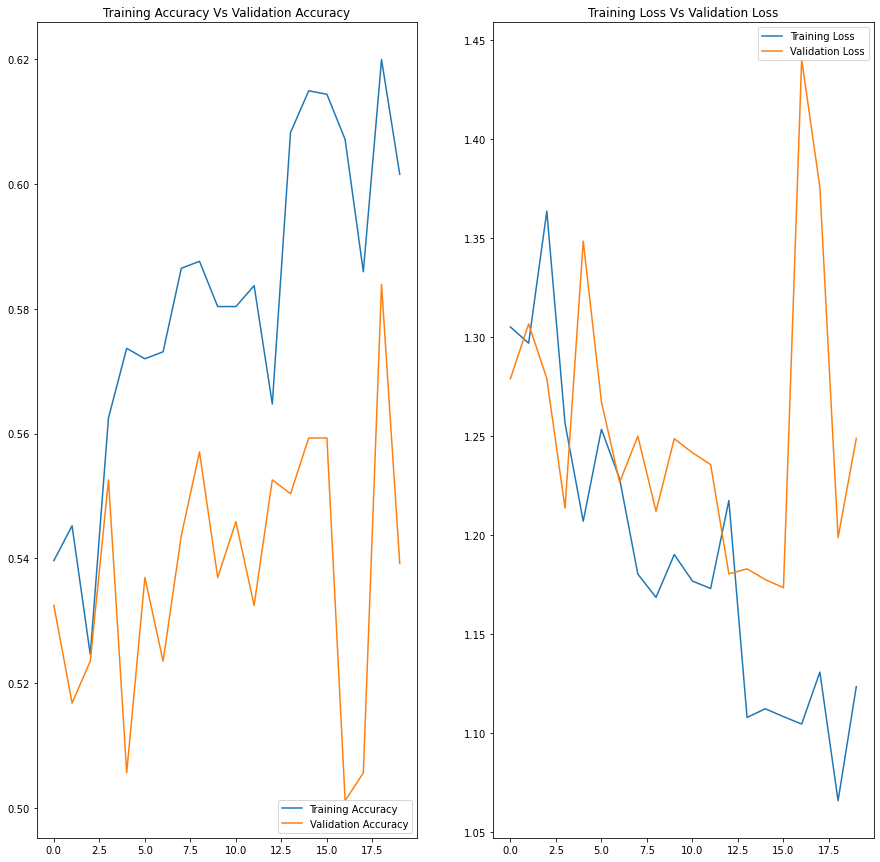

In [93]:
fn_viz_model_results(model_id="model_3", history=history_3, epochs=20)

### Test Accurracy of final Model_3 on the Test Data

In [ ]:
fn_header_print("Create New Training Dataset")

train_ds_3 = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=200,
    validation_split = 0.2,
    subset = 'training',
    image_size=(image_height, image_width),
    batch_size=batch_size
)

## Overall Conclusion
- Without a dropout rate and given set of sample images, the model was overfitting
- With a dropout rate of 0.3, the overfitting was reduced but the accuracy on the train/test data was still low
- Using an Augmentor to increase the sample size to 1000 significantly improved the accuracy of the model accuracy